In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/ML files/avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
num_feature=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags']

**Removel of Outliers from all numeric variables**

In [5]:
quantile_25=df[num_feature].quantile(0.25)
quantile_75=df[num_feature].quantile(0.75)
interquantile=quantile_75-quantile_25

print(interquantile)

AveragePrice         0.56
Total Volume    422123.71
4046            110166.13
4225            147198.08
4770              6243.42
Total Bags      105694.73
Small Bags       80488.25
Large Bags       21901.78
dtype: float64


In [6]:
df_filter=df[~((df[num_feature]< (quantile_25 - 3*interquantile))|(df[num_feature] > (quantile_75 + 3*interquantile))).any(axis=1)]

In [7]:
df_filter.shape

(14306, 14)

In [8]:
df_filter

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [9]:
cat_feature =["type", "region"]
out_feature=["AveragePrice"]

In [10]:
import warnings
warnings.filterwarnings('ignore')


In [11]:
df_filter.drop(["Unnamed: 0", "Date"], axis=1, inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder={}
for feature in cat_feature:
  lbl_encoder[feature] = LabelEncoder()
  df_filter[feature] = lbl_encoder[feature].fit_transform(df_filter[feature])


In [13]:
### Stacking and Converting Into Tensors
cat_feature=np.stack([df_filter["type"], df_filter["region"]], 1)
cat_feature

array([[ 0,  0],
       [ 0,  0],
       [ 0,  0],
       ...,
       [ 1, 53],
       [ 1, 53],
       [ 1, 53]])

In [14]:
### Convert numpy to Tensors
import torch
cat_feature=torch.tensor(cat_feature, dtype=torch.int64)
cat_feature

tensor([[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 1, 53],
        [ 1, 53],
        [ 1, 53]])

In [15]:
df_filter.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [16]:
#### create continuous variable
num_feature=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [17]:
num_feature=[]
for i in df_filter.columns:
  if i in ['type', 'region']:
    pass
  else:
    num_feature.append(i) 

In [18]:
num_feature

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

In [19]:
### Stacking continuous variable to a tensor
num_values=np.stack([df_filter[i].values for i in num_feature], axis=1)
num_values = torch.tensor(num_values, dtype=torch.float)
num_values

tensor([[1.3300e+00, 6.4237e+04, 1.0367e+03,  ..., 9.3250e+01, 0.0000e+00,
         2.0150e+03],
        [1.3500e+00, 5.4877e+04, 6.7428e+02,  ..., 9.7490e+01, 0.0000e+00,
         2.0150e+03],
        [9.3000e-01, 1.1822e+05, 7.9470e+02,  ..., 1.0314e+02, 0.0000e+00,
         2.0150e+03],
        ...,
        [1.8700e+00, 1.3767e+04, 1.1919e+03,  ..., 4.2310e+01, 0.0000e+00,
         2.0180e+03],
        [1.9300e+00, 1.6205e+04, 1.5276e+03,  ..., 5.0000e+01, 0.0000e+00,
         2.0180e+03],
        [1.6200e+00, 1.7490e+04, 2.8948e+03,  ..., 2.6010e+01, 0.0000e+00,
         2.0180e+03]])

In [20]:
num_values.dtype

torch.float32

In [21]:
### Dependent Feature 
y= torch.tensor(df_filter["AveragePrice"].values, dtype = torch.float).reshape(-1,1)
y

tensor([[1.3300],
        [1.3500],
        [0.9300],
        ...,
        [1.8700],
        [1.9300],
        [1.6200]])

In [22]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14306 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14306 non-null  float64
 1   Total Volume  14306 non-null  float64
 2   4046          14306 non-null  float64
 3   4225          14306 non-null  float64
 4   4770          14306 non-null  float64
 5   Total Bags    14306 non-null  float64
 6   Small Bags    14306 non-null  float64
 7   Large Bags    14306 non-null  float64
 8   XLarge Bags   14306 non-null  float64
 9   type          14306 non-null  int64  
 10  year          14306 non-null  int64  
 11  region        14306 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 1.4 MB


In [23]:
cat_feature.shape, num_values.shape, y.shape

(torch.Size([14306, 2]), torch.Size([14306, 10]), torch.Size([14306, 1]))

In [24]:
#### Embedding Size For Categorical columns
len(df_filter['region'].unique())

54

In [25]:
cat_dims = [len(df_filter[col].unique()) for col in ["type", "region"]]
cat_dims

[2, 54]

In [26]:
embedding_dims=[(x, min(50, (x+1)//2)) for x in cat_dims]
embedding_dims

[(2, 1), (54, 27)]

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [28]:
embed_representation=nn.ModuleList([nn.Embedding(inp, out) for inp, out in embedding_dims])
embed_representation

ModuleList(
  (0): Embedding(2, 1)
  (1): Embedding(54, 27)
)

In [29]:
cat_feature

tensor([[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 1, 53],
        [ 1, 53],
        [ 1, 53]])

In [30]:
cat_featuresz=cat_feature[:2]
cat_featuresz

tensor([[0, 0],
        [0, 0]])

In [31]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i, e in enumerate(embed_representation):
  embedding_val.append(e(cat_feature[:, i]))
  

In [32]:
embedding_val

[tensor([[0.6039],
         [0.6039],
         [0.6039],
         ...,
         [0.4315],
         [0.4315],
         [0.4315]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.4292,  0.9833, -2.2339,  ..., -1.1910,  1.0134,  0.3036],
         [-0.4292,  0.9833, -2.2339,  ..., -1.1910,  1.0134,  0.3036],
         [-0.4292,  0.9833, -2.2339,  ..., -1.1910,  1.0134,  0.3036],
         ...,
         [ 0.8453, -0.4687, -0.7836,  ...,  0.3202, -0.1921,  1.4589],
         [ 0.8453, -0.4687, -0.7836,  ...,  0.3202, -0.1921,  1.4589],
         [ 0.8453, -0.4687, -0.7836,  ...,  0.3202, -0.1921,  1.4589]],
        grad_fn=<EmbeddingBackward>)]

In [33]:
z=torch.cat(embedding_val,1)
z

tensor([[ 0.6039, -0.4292,  0.9833,  ..., -1.1910,  1.0134,  0.3036],
        [ 0.6039, -0.4292,  0.9833,  ..., -1.1910,  1.0134,  0.3036],
        [ 0.6039, -0.4292,  0.9833,  ..., -1.1910,  1.0134,  0.3036],
        ...,
        [ 0.4315,  0.8453, -0.4687,  ...,  0.3202, -0.1921,  1.4589],
        [ 0.4315,  0.8453, -0.4687,  ...,  0.3202, -0.1921,  1.4589],
        [ 0.4315,  0.8453, -0.4687,  ...,  0.3202, -0.1921,  1.4589]],
       grad_fn=<CatBackward>)

In [34]:



#### Implement dropupout
dropout=nn.Dropout(.4)

In [35]:


final_embed=dropout(z)
final_embed

tensor([[ 0.0000, -0.7153,  1.6389,  ..., -1.9850,  1.6890,  0.5060],
        [ 0.0000, -0.0000,  0.0000,  ..., -0.0000,  1.6890,  0.5060],
        [ 1.0065, -0.7153,  1.6389,  ..., -0.0000,  1.6890,  0.5060],
        ...,
        [ 0.0000,  0.0000, -0.0000,  ...,  0.5336, -0.3202,  2.4316],
        [ 0.7191,  1.4088, -0.7811,  ...,  0.5336, -0.0000,  2.4316],
        [ 0.0000,  1.4088, -0.0000,  ...,  0.0000, -0.3202,  2.4316]],
       grad_fn=<MulBackward0>)

In [36]:
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dims, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dims])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dims))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [37]:
len(num_feature)

10

In [38]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dims,len(num_feature),1,[100,50],p=0.4)

In [39]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(54, 27)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=38, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [40]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [41]:
df_filter.shape

(14306, 12)

In [42]:
batch_size = 14306
test_size = int(batch_size*0.15)
train_categorical = cat_feature[:batch_size - test_size]
test_categorical = cat_feature[batch_size - test_size: batch_size]
train_num = num_values[:batch_size - test_size]
test_num = num_values[batch_size -  test_size: batch_size]
y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size:batch_size]

In [43]:

len(train_categorical), len(test_categorical), len(train_num), len(test_num), len(y_train), len(y_test)

(12161, 2145, 12161, 2145, 12161, 2145)

In [44]:
epochs=520
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model(train_categorical, train_num)
  loss=torch.sqrt(loss_function(y_pred, y_train))
  final_losses.append(loss)
  if i%10 == 1:
    print("Epoch number: {} and loss: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and loss: 1.6825826168060303
Epoch number: 11 and loss: 1.5470324754714966
Epoch number: 21 and loss: 1.4352529048919678
Epoch number: 31 and loss: 1.3835926055908203
Epoch number: 41 and loss: 1.3454737663269043
Epoch number: 51 and loss: 1.308367133140564
Epoch number: 61 and loss: 1.2802170515060425
Epoch number: 71 and loss: 1.2572110891342163
Epoch number: 81 and loss: 1.2278441190719604
Epoch number: 91 and loss: 1.1978868246078491
Epoch number: 101 and loss: 1.1587244272232056
Epoch number: 111 and loss: 1.130661964416504
Epoch number: 121 and loss: 1.0858805179595947
Epoch number: 131 and loss: 1.041932225227356
Epoch number: 141 and loss: 0.9948590993881226
Epoch number: 151 and loss: 0.9295032620429993
Epoch number: 161 and loss: 0.8672378063201904
Epoch number: 171 and loss: 0.8063154220581055
Epoch number: 181 and loss: 0.7334136962890625
Epoch number: 191 and loss: 0.6681170463562012
Epoch number: 201 and loss: 0.6244848370552063
Epoch number: 211 and loss:

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 0, 'epoch')

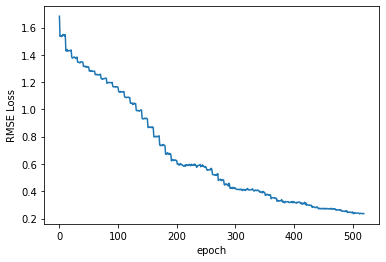

In [46]:
plt.plot(range(epochs), final_losses)
plt.ylabel("RMSE Loss")
plt.xlabel("epoch")

In [47]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
  y_pred = model(test_categorical, test_num)
  loss= torch.sqrt(loss_function(y_pred, y_test))



In [48]:
print("RMSE:{}".format(loss))

RMSE:0.3762643337249756


In [49]:
data_verify = pd.DataFrame(y_test.tolist(), columns=["Test"])

In [50]:
data_predicted = pd.DataFrame(y_pred.tolist(), columns= ["Prediction"])

In [51]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']


In [52]:
final_output

,Test,Prediction,Difference
0,1.45,1.097704,0.352296
1,1.31,0.955020,0.354980
2,1.60,1.589170,0.010830
3,1.55,1.306661,0.243339
4,1.59,1.345453,0.244547
...,...,...,...
2140,1.63,1.299587,0.330413
2141,1.71,1.147842,0.562158
2142,1.87,1.253011,0.616989
2143,1.93,1.506546,0.423454


In [53]:
#### Saving The Model
#### Save the model
torch.save(model, "AvocadoPrice.pt")


In [54]:
torch.save(model.state_dict(), "AvocadoPrice.pt")

In [55]:
### Loading the saved Model
embs_size=[(2,1), (54, 27)]
model1=FeedForwardNN(embs_size,10,1,[100,50],p=0.4)

In [56]:
model1.load_state_dict(torch.load('AvocadoPrice.pt'))

<All keys matched successfully>

In [57]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(54, 27)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=38, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)